In [1]:
import tensorflow_quantum as tfq
import cirq
import numpy as np
import tensorflow as tf
import quple

In [2]:
from quple.trial_wavefunction.real_amplitudes import RealAmplitudes
# define a PQC
n_qubit = 5
# define a parameterised circuit
cq = RealAmplitudes(n_qubit)
cq

┌──┐       ┌──┐                                 ┌──┐       ┌──┐
(0, 0): ───Ry(θ_0)───@───@───@────@────────────────────────Ry(θ_5)───@───@───@────@────────────────────────
                     │   │   │    │                                  │   │   │    │
(1, 0): ───Ry(θ_1)───X───┼───┼────┼@────@────@─────────────Ry(θ_6)───X───┼───┼────┼@────@────@─────────────
                         │   │    ││    │    │                           │   │    ││    │    │
(2, 0): ───Ry(θ_2)───────X───┼────┼X────┼────┼@────@───────Ry(θ_7)───────X───┼────┼X────┼────┼@────@───────
                             │    │     │    ││    │                         │    │     │    ││    │
(3, 0): ───Ry(θ_3)───────────X────┼─────X────┼X────┼───@───Ry(θ_8)───────────X────┼─────X────┼X────┼───@───
                                  │          │     │   │                          │          │     │   │
(4, 0): ───Ry(θ_4)────────────────X──────────X─────X───X───Ry(θ_9)────────────────X──────────X─────X───X───
                                 └──┘       └──┘                                 └──┘       └──┘

# Gradient Variance Test

In [3]:
# define a measurement
qubits = cq.qubits
op = cirq.Z(qubits[0]) * cirq.Z(qubits[1])

In [4]:
# Do the gradient variance test
quple.gradient_variance_test([cq]*200, op)

0.36237746

# Sample Circuit Qubit Final States

In [5]:
final_states = quple.sample_final_states(cq, samples=200)
final_states

Instructions for updating:
reduction_indices is deprecated, use axis instead


[array([ 0.264626  +3.54617669e-08j,  0.03475618+9.75377290e-09j,
        -0.01905468-1.30760762e-08j,  0.32711267+6.39218740e-08j,
        -0.04961146-2.56639936e-08j, -0.01359508-1.29517925e-08j,
        -0.0325923 -2.59468056e-08j,  0.05802456+4.11439096e-08j,
        -0.31175756-1.56992343e-07j,  0.08495113-2.00351344e-08j,
        -0.06272218-8.33051104e-08j,  0.37101853+2.39298942e-07j,
         0.37473848+1.08626814e-07j,  0.08116138-2.59988404e-08j,
        -0.05362159-5.20219103e-08j,  0.47691143+1.86977431e-07j,
         0.02625842+1.43606522e-08j, -0.00157611+6.28673025e-09j,
         0.00993547+1.01426947e-08j, -0.03104045-2.19039240e-08j,
        -0.07374337-9.52438306e-09j, -0.01133002+4.60872940e-09j,
         0.00668137+1.10431291e-08j, -0.09186109-2.17159162e-08j,
        -0.24242546-7.12436758e-08j, -0.03841309+1.35245344e-08j,
         0.02293731+3.61773509e-08j, -0.30248585-1.19501678e-07j,
         0.09514217+8.08158376e-08j, -0.00898688+2.13456985e-08j,
         0

# Sample Circuit Qubit Density Matrices

In [6]:
density_matrices = quple.sample_density_matrices(cq, samples=200)
density_matrices

[array([[ 8.5257953e-03+0.0000000e+00j,  7.8306263e-03-2.4367186e-10j,
         -1.8055252e-03-6.5080752e-10j, ...,
         -1.9810300e-02+7.2992705e-09j,  9.9272355e-03-6.5784338e-09j,
          5.8134896e-04-5.8471761e-09j],
        [ 7.8306263e-03+2.4367186e-10j,  7.1921404e-03+0.0000000e+00j,
         -1.6583080e-03-6.4934547e-10j, ...,
         -1.8195026e-02+6.1379204e-09j,  9.1177979e-03-5.7583218e-09j,
          5.3394743e-04-5.3537992e-09j],
        [-1.8055252e-03+6.5080752e-10j, -1.6583080e-03+6.4934547e-10j,
          3.8235981e-04+0.0000000e+00j, ...,
          4.1952683e-03-3.0579799e-09j, -2.1023112e-03+2.1509137e-09j,
         -1.2311347e-04+1.2826452e-09j],
        ...,
        [-1.9810300e-02-7.2992705e-09j, -1.8195026e-02-6.1379204e-09j,
          4.1952683e-03+3.0579799e-09j, ...,
          4.6030663e-02+0.0000000e+00j, -2.3066649e-02+6.7863661e-09j,
         -1.3508062e-03+1.3088619e-08j],
        [ 9.9272355e-03+6.5784338e-09j,  9.1177979e-03+5.7583218e-09j,
    

# Meyer Wallach measure of a State

In [7]:
Meyer_Wallach_measure = quple.Meyer_Wallach_measure(final_states[0])
Meyer_Wallach_measure

0.8098458103321488

# Meyer Wallach measure of a Bell State

In [10]:
bell_circuit = quple.bell_circuit
final_state = quple.sample_final_states(bell_circuit)[0]
Meyer_Wallach_measure = quple.Meyer_Wallach_measure(final_state)
Meyer_Wallach_measure

0.999999880790714

# The von Neumann entropy of PQC
- Parameters are filled with randomized values between 0 and 2pi and the circuit is sampled many times

In [8]:
quple.circuit_von_neumann_entropy(cq, samples=200)

1.7925028923583488e-06

# The Entangling measure of PQC
- This is the mean Meyer Wallach measure of all the final states sampled from the circuit
- Parameters are filled with randomized values between 0 and 2pi and the circuit is sampled many times

In [12]:
quple.circuit_entangling_measure(cq, samples=200)

0.6035269135240914

# The Expressibility measure of PQC
- This is the Kullback Leibler divergence between the fidelity pdf of PQC and the Haar fidelity pdf
- Parameters are filled with randomized values between 0 and 2pi and the circuit is sampled many times

In [9]:
quple.circuit_expressibility_measure(cq, samples=3000, bins=100)

2.666621229525022

#  Plotting the fidelity pdf of PQC and Haar

<module 'matplotlib.pyplot' from '/afs/cern.ch/work/c/chlcheng/public/local/conda/miniconda/envs/ml-base/lib/python3.7/site-packages/matplotlib/pyplot.py'>

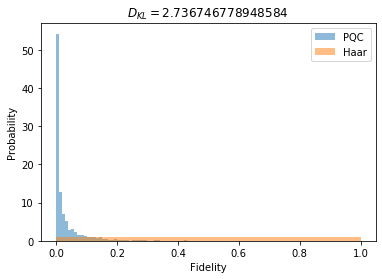

In [10]:
quple.circuit_fidelity_plot(cq, samples=3000, bins=100)

# Reproducing results from the paper page 5:
# https://arxiv.org/pdf/1905.10876.pdf

In [11]:
import sympy as sp
# circuit A
cq_A = quple.QuantumCircuit(n_qubit=1)
cq_A.H(0)
cq_A.RZ(sp.Symbol('x'),0)
cq_A

(0, 0): ───H───Rz(x)───

In [12]:
# circuit B
cq_B = quple.QuantumCircuit(n_qubit=1)
cq_B.H(0)
cq_B.RZ(sp.Symbol('x_0'),0)
cq_B.RX(sp.Symbol('x_1'),0)
cq_B

(0, 0): ───H───Rz(x_0)───Rx(x_1)───

<module 'matplotlib.pyplot' from '/afs/cern.ch/work/c/chlcheng/public/local/conda/miniconda/envs/ml-base/lib/python3.7/site-packages/matplotlib/pyplot.py'>

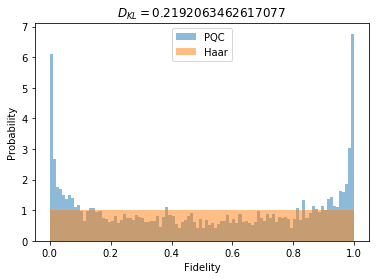

In [13]:
quple.circuit_fidelity_plot(cq_A, samples=3000, bins=100)

<module 'matplotlib.pyplot' from '/afs/cern.ch/work/c/chlcheng/public/local/conda/miniconda/envs/ml-base/lib/python3.7/site-packages/matplotlib/pyplot.py'>

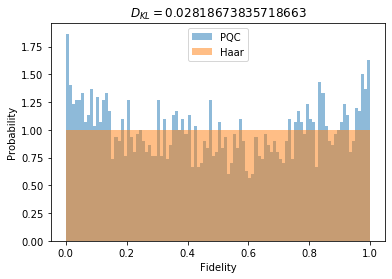

In [14]:
quple.circuit_fidelity_plot(cq_B, samples=3000, bins=100)